In [1]:
import numpy as np
from skimage import io
from PIL import Image
import matplotlib.pyplot as plt
import cv2

Dato sintético. Debe agregarse algoritmo de reconocimiento automático de unidad productiva.

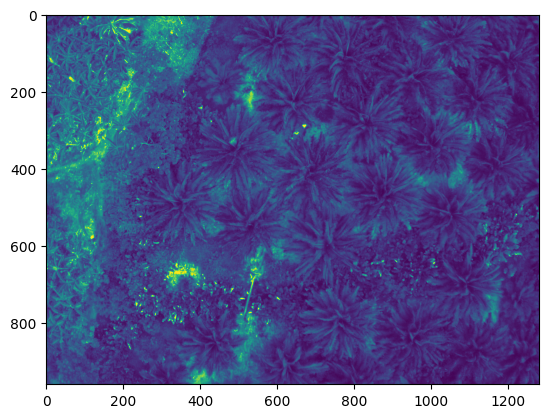

In [2]:
red = plt.imread("img/3. IMG_700101_000458_0092_RED.TIF")
plt.imshow(red)
plt.show()

In [3]:
left = 370
top = 220
right = 600
bottom = 450

In [4]:
def crop_image(image, left, top, right, bottom):
    img = Image.open(image)
    img_cropped = img.crop((left, top, right, bottom))
    plt.imshow(img_cropped)
    plt.show()
    return img_cropped

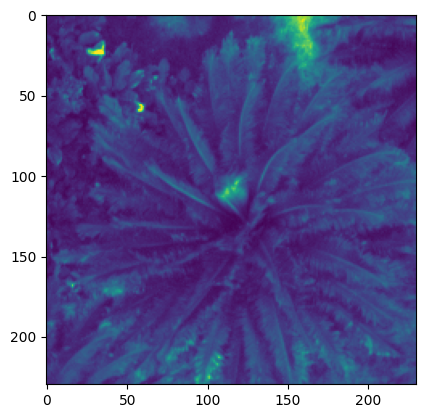

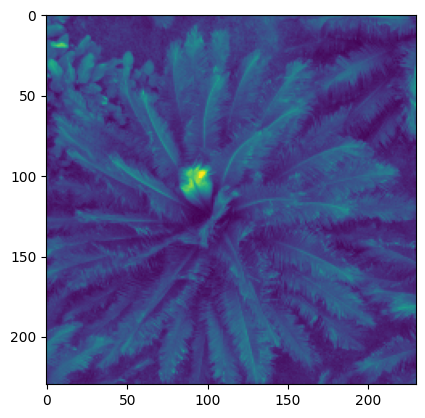

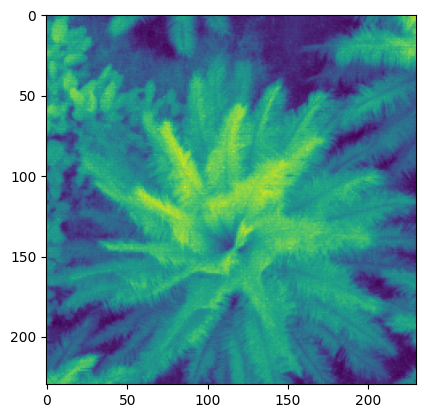

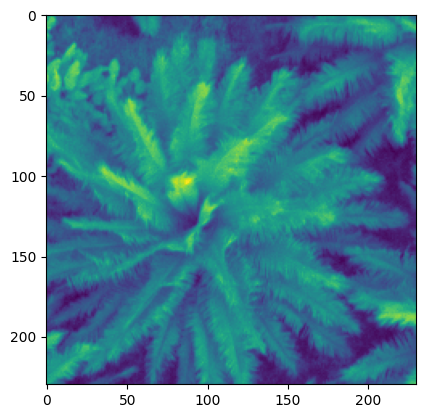

In [5]:
red = crop_image("img/3. IMG_700101_000458_0092_RED.TIF", left, top, right, bottom)
red.save("./img/cropped/red.tif")
gre = crop_image("img/1. IMG_700101_000458_0092_GRE.TIF", left, top, right, bottom)
gre.save("./img/cropped/gre.tif")
nir = crop_image("img/2. IMG_700101_000458_0092_NIR.TIF", left, top, right, bottom)
nir.save("./img/cropped/nir.tif")
reg = crop_image("img/4. IMG_700101_000458_0092_REG.TIF", left, top, right, bottom)
reg.save("./img/cropped/reg.tif")

In [6]:
# Load the cropped images
gre = cv2.imread('./img/cropped/gre.tif', cv2.IMREAD_GRAYSCALE)
nir = cv2.imread('./img/cropped/nir.tif', cv2.IMREAD_GRAYSCALE)
red = cv2.imread('./img/cropped/red.tif', cv2.IMREAD_GRAYSCALE)
reg = cv2.imread('./img/cropped/reg.tif', cv2.IMREAD_GRAYSCALE)

In [7]:
# Convert to float32 and scale the pixel values to [0, 1]
gre = gre.astype(np.float32) / 255.0
nir = nir.astype(np.float32) / 255.0
red = red.astype(np.float32) / 255.0
reg = reg.astype(np.float32) / 255.0

In [8]:
# Calculate the NDVI index
ndvi = (nir - red) / (nir + red)

# Merge the channels into a multispectral image with NDVI as an index
msi = np.dstack((nir, red, gre, ndvi))

# Scale the pixel values back to [0, 255]
msi = (msi * 255).astype(np.uint8)

/var/folders/cr/d_063phd0572skkv1bwmdz6h0000gn/T/ipykernel_17129/1643716876.py:8: RuntimeWarning: invalid value encountered in cast
  msi = (msi * 255).astype(np.uint8)


In [9]:
# Save the multispectral image as a TIFF file
cv2.imwrite('msi_ndvi.tif', msi)

True

In [10]:
# Save as a NumPy array
np.save('./img/multispectral.npy', msi)